### Introductory Iris collecting with Ronald

Working with the Iris dataset is a standard exercise in machine learning.  Here I'm using a simple k-nearest neighbors method to classify new specimens in one of three species of iris, *setosa*, *versicolor*, or *virginica*.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import mglearn # package associated with Introduction to Machine Learning with Python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

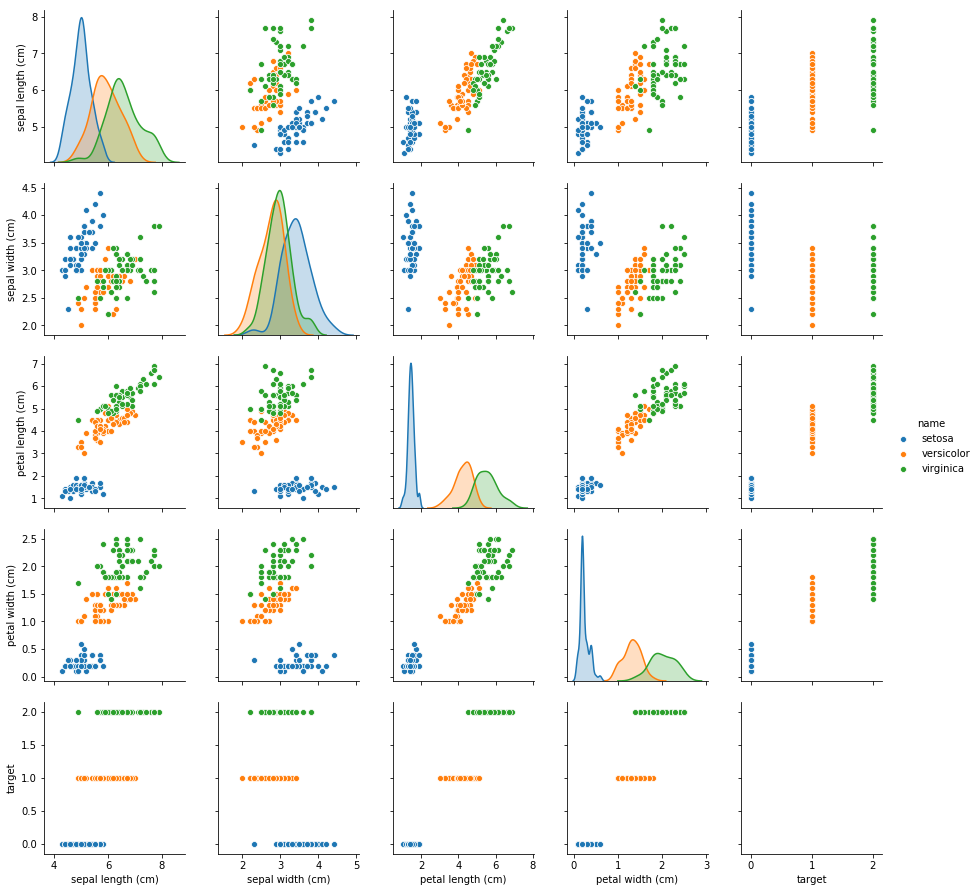

In [14]:
iris_data=load_iris()
data_df = pd.DataFrame(iris_data['data'],columns=iris_data['feature_names'])
data_df['target'] = iris_data['target']
names_df = pd.DataFrame(iris_data['target_names'])
names_df.columns=['name']
names_df = names_df.reset_index()
iris_data_df = data_df.merge(names_df,left_on='target',right_on='index',how='inner').drop('index',axis=1)
pp = sns.pairplot(iris_data_df.iloc[:,0:7],hue='name')
pp

So here's the data, arranged into a dataframe and visualized based on the description of its structure that can be found under the 'DESCR' key of the iris_data dictionary.  The plots on the diagonal show the distribution of each characteristic; for example, the first plot on the diagonal shows that the sepal length of the setosa iris has a mode of about 5 cm (note the horizontal axis scale).  The scatterplots show that for some pairs of characteristics, the three groups are quite distinct (for example, petal width vs sepal width); for other pairs of characteristics, the groups are somewhat less distinct (for example, petal width vs sepal length).  

In [3]:
print(iris_data.keys())
print(iris_data['DESCR'][:50])
print(iris_data['data'][:5])
print(iris_data['target'][:10])


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
-----------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0]


### What if we needed an algorithm for classifying new specimens?

We could use multinomial logistic regression to model the relationship between the measurements in the data set and the target classifications, with the same use of training and test datasets for cross-validation.  Alternatively, we could use a simple form of machine learning, the k-nearest neighbors algorithm.  This algorithm produces a prediction for new data based on values of some number k of that data's "nearest" neighbors.  In this case, the algorithm will be able to a species classification for a new iris based on its sepal and petal dimensions based on the classification known to be assigned to irises that are "nearest" the new data with respect to sepal and petal dimensions.  We can alter what counts as "nearest" by changing features of the metric used by the classifier; in this case we will just use the default Euclidean metric (Minkowski p=2).

First, we'll split the data 75-25 into a training and a test set, using a function from scikit-learn.  This function, train_test_split, takes an array of data (or a dataframe), a target array (or dataframe), and a seed for the pseudorandom number generator.  (The 75-25 split between training and test is the default behavior for this function.) The function returns a list of the data training set, data test set, target training set, and target test set, so we can then unpack it.

Then, take a look at the top of the training data (X_train) and the top of the training targets (y_train).

In [15]:
tts = train_test_split(iris_data['data'],iris_data['target'],random_state=0)
tts = train_test_split(iris_data_df.iloc[:,0:4], iris_data_df['target'],random_state=0)  # equivalent
X_train,X_test,y_train,y_test = tts
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [16]:
y_train.head()

61     1
92     1
112    2
2      0
141    2
Name: target, dtype: int64

In [17]:
from sklearn.neighbors import KNeighborsClassifier
ronald = KNeighborsClassifier(n_neighbors = 1)  # creating an estimator object, specifically a kneighbors classfier, set to use just a single nearest neighbor


The classifier 'ronald' needs to be trained using the training data and corresponding training targets; training really just involves storing the data.

In [18]:
ronald.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

When we ask 'ronald' to make a classification, all it does is find which training point is nearest in a simple straight line to the new data point, and then assign it the classification of that training point.  For example, consider a new iris with sepal and petal dimensions similar to that of *setosa* irises (id = 0):  

In [19]:
new_iris = np.array([[4,4,2,.5]])
ronald_says = ronald.predict(new_iris)
print(ronald_says)
print(iris_data['target_names'][ronald_says])

[0]
['setosa']


Now, how accurate is ronald in predicting the species of irises in the test dataset?  First, let's compare them side-by-side:

In [20]:
test_ronald = ronald.predict(X_test)
ronald_results = pd.DataFrame(dict(ronald=test_ronald,actual=y_test))
ronald_results.head()

,ronald,actual
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


A straightforward way of assessing ronald's accuracy is by calculating the proportion of correct classifications, which can be done elegantly like this by taking advantage of the fact that the np.mean() function interprets True as 1 and False as 0:

In [21]:
np.mean(test_ronald == y_test)

0.9736842105263158

What if ronald used a different number of nearest neighbors?  Many values of k yield the same accuracy, but larger values decrease ronald's performance.    

In [22]:
k=40
ronaldplus = KNeighborsClassifier(n_neighbors = k)  
ronaldplus.fit(X_train,y_train)
test_ronaldplus = ronaldplus.predict(X_test)
np.mean(test_ronaldplus == y_test)


0.868421052631579

What if ronald used a different value of p in the Minkowski metric?  Interestingly, for p=100, ronaldplusplus classifies all the new test irises perfectly.

In [23]:
k=1
p=100
ronaldplusplus = KNeighborsClassifier(n_neighbors = k,p=p)  
ronaldplusplus.fit(X_train,y_train)
test_ronaldplusplus = ronaldplusplus.predict(X_test)
np.mean(test_ronaldplusplus == y_test)

1.0

### Further questions we might want to ask:

1. Did ronald just get lucky?  That is, if we had divided the data into different training and test sets, would ronald have performed as well?  One way to answer this would be to calculate accuracy scores for large numbers of random training-versus-test divisions, then measure their dispersion.  This could be done by turning the whole process into a function with k, p, and the seed for the train_test_split function as the inputs and a single accuracy score as the output, then using a higher-order function to apply this function many times with different seeds and save the accuracy score each time.  
2. How should we determine optimal values for k, and for the metric?  Again, an iterative approach might be useful.    